<a href="https://colab.research.google.com/github/matheusortiz/facemask-detector-yolov3/blob/main/ortiz_facemask_detector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monta o drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/face_mask_detection

Cria pasta para salvar anotações

In [ ]:
!mkdir mask_yolo_train

Script para converte anotações de *xml* para *txt*

In [ ]:
!python xml_to_yolo.py --input=annotations --output=mask_yolo_train

Lista anotações

In [ ]:
!ls mask_yolo_train// -1 | wc -l

Copia imagens para a pasta de treinamento



In [ ]:
!cp -r images/. mask_yolo_train

Após separação manual das imagens de teste das imagens de treinamento listei as quantidades de imagens com as respectivas anotações

In [ ]:
%cd mask_yolo_train
!ls -F | grep .png | wc -l
!ls -F | grep .txt | wc -l
%cd ..

%cd mask_yolo_test
!ls -F | grep .png | wc -l
!ls -F | grep .txt | wc -l
%cd ..

/content/gdrive/My Drive/face_mask_detection/mask_yolo_train
767
767
/content/gdrive/My Drive/face_mask_detection
/content/gdrive/My Drive/face_mask_detection/mask_yolo_test
86
86
/content/gdrive/My Drive/face_mask_detection


Cria **train.txt** e **test.txt** contendo o caminho absoluto dos arquivos das pastas **mask_yolo_train** e **mask_yolo_test**

In [ ]:
import os

for dataset, txtname in zip(['mask_yolo_train/', 'mask_yolo_test/'], ['train.txt', 'test.txt']):
    image_files = []
    # Given we are already being located into /face_mask_detection folder
    os.chdir(os.path.abspath(dataset))
    count=0
    for filename in os.listdir(os.getcwd()):
      if filename.endswith(".png"):
          image_files.append(os.path.abspath(os.getcwd()) + '/' + filename)

    os.chdir("..")
    with open(txtname, "w") as outfile:
        for image in image_files:
            outfile.write(image)
            outfile.write("\n")
        outfile.close()

In [ ]:
!cp train.txt ../darknet/data
!cp test.txt ../darknet/data

Clona a **darknet** e abre o respectivo diretório

In [2]:
#!git clone https://github.com/AlexeyAB/darknet
%cd /content/gdrive/MyDrive/data/darknet

/content/gdrive/MyDrive/data/darknet


Imprime a **GPU**

In [ ]:
!nvidia-smi

Wed Apr 28 12:00:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Seta configuração de GPUs no *makefile*

Compila o Cuda

In [ ]:
# change makefile to have GPU, OPENCV and LIBSO enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


Compila o framework darknet

In [ ]:
!make

Baixa pesos pré-treinados do modelo yolov3

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-04-08 21:13:24--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  8.40MB/s    in 26s     

2021-04-08 21:13:51 (5.94 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



Seta permissão de execução ao framework

In [4]:
!chmod +x ./darknet


**darknet/data/** deve conter: 
  * train.txt
  * face_mask.data
  * face_mask.names*
  
**darknet/cfg/** deve conter
  * face_mask.cfg

Treina a rede

In [ ]:
!./darknet detector train data/face_mask.data cfg/face_mask.cfg darknet53.conv.74 -dont_show -i 0 -map -points 0

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.764450), count: 5, class_loss = 0.073844, iou_loss = 0.230112, total_loss = 0.303956 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.004834, iou_loss = 0.000000, total_loss = 0.004834 
 total_bbox = 563121, rewritten_bbox = 0.037825 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.676895), count: 2, class_loss = 0.004982, iou_loss = 0.108969, total_loss = 0.113951 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.738544), count: 4, class_loss = 0.601724, iou_loss = 0.431957, total_loss = 1.033680 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.717282), count: 4, class_loss = 1.082446, iou_loss = 0.248165, total_loss = 1.330611 
 total_bbox = 563131, rewritten_bbox = 0.037824 % 
v3 (m

Verifica o mAP0.5 pelos melhores pesos

In [ ]:
!./darknet detector map data/face_mask.data cfg/face_mask.cfg backup/face_mask_best.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,

Executa comando de teste possibilitando carregar imagens para detecção e classificação

In [13]:
!./darknet detector test data/face_mask.data cfg/face_mask.cfg backup/face_mask_best.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

Exibe a imagem carregada e predição 

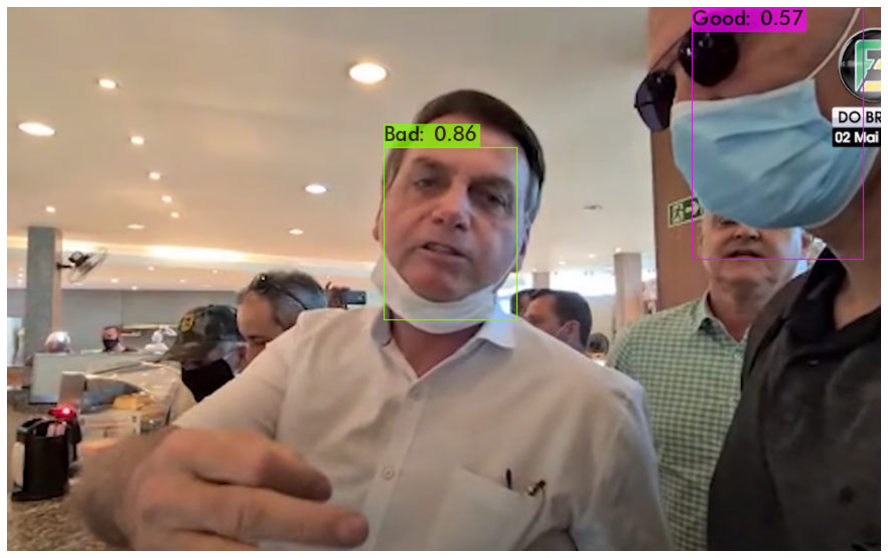

In [14]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

imShow('predictions.jpg')